## Potato Disease Classification

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy

C:\Users\yashg\anaconda3\envs\tf_keras_env\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


### Import data into tensorflow dataset object

In [2]:

IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
!pip install split-folders


In [4]:
train_datagen = ImageDataGenerator(
rescale = 1./255,
    rotation_range = 10,
    horizontal_flip = True
)

train_generator = train_datagen.flow_from_directory(
'dataset/train',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = "sparse"
)


Found 1506 images belonging to 3 classes.


In [5]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
# count=0
# for image_batch, label_batch in train_generator:
#     print(image_batch[0])
#     break

In [8]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [9]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [10]:
# for image_batch, label_batch in test_generator:
#     print(image_batch[0])
#     break

### Building the Model

In [11]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

### Compiling the model

use adam optimizer, SparseCategoricalCrossentropy for losses, accuracy as metric.

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 88s 2s/step - loss: 0.9053 - accuracy: 0.4790 - val_loss: 0.8671 - val_accuracy: 0.6354
Epoch 2/20
47/47 [==============================] - 78s 2s/step - loss: 0.7802 - accuracy: 0.6269 - val_loss: 1.0127 - val_accuracy: 0.4896
Epoch 3/20
47/47 [==============================] - 77s 2s/step - loss: 0.5340 - accuracy: 0.7564 - val_loss: 0.3653 - val_accuracy: 0.8594
Epoch 4/20
47/47 [==============================] - 76s 2s/step - loss: 0.3885 - accuracy: 0.8412 - val_loss: 0.3927 - val_accuracy: 0.8229
Epoch 5/20
47/47 [==============================] - 76s 2s/step - loss: 0.3276 - accuracy: 0.8684 - val_loss: 0.2723 - val_accuracy: 0.8906
Epoch 6/20
47/47 [==============================] - 77s 2s/step - loss: 0.2477 - accuracy: 0.9030 - val_loss: 0.2541 - val_accuracy: 0.8854
Epoch 7/20
47/47 [==============================] - 77s 2s/step - loss: 0.2183 - accuracy: 0.9098 - val_loss: 0.2069 - val_accuracy: 0.9167
Epoch 8/20
47/47 [==

In [15]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 6s 451ms/step - loss: 0.0776 - accuracy: 0.9814


In [16]:
scores #Scores is just a list containing loss and accuracy value

[0.07761137187480927, 0.9814385175704956]

### Plotting the Accuracy and Loss Curves

In [18]:
history

In [19]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


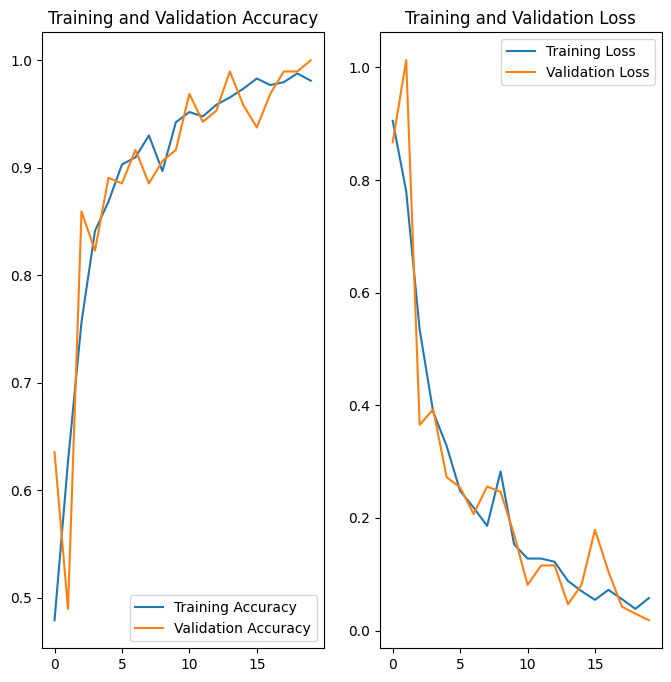

In [22]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a simple image

In [ ]:
import numpy as np

for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for interfere

In [23]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

### Saving the model

In [24]:
model.save('C:Users/yashg/Desktop/sain_DL_potatodisease/potatos.h5')

C:\Users\yashg\anaconda3\envs\tf_keras_env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
